# __Workshop 3, Advanced AI - Statistics Module__

## __Hypothesis testing - comparing the mean of 2 groups__

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib

import matplotlib.pyplot as plt

INTEL = pdr.get_data_yahoo('INTC', start="01/01/2017", interval="m")
INTEL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,38.450001,36.189999,36.610001,36.820000,456335100.0,31.593967
2017-02-01,36.950001,34.840000,36.820000,36.200001,477551300.0,31.061974
2017-03-01,36.299999,34.660000,35.849998,36.070000,546151800.0,31.171373
2017-04-01,37.500000,35.209999,36.189999,36.150002,444122200.0,31.240505
2017-05-01,37.169998,35.020000,36.110001,36.110001,432927300.0,31.205944


In [3]:
AMD = pdr.get_data_yahoo('AMD', start="01/01/2017", interval="m")
AMD.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,11.69,9.42,11.42,10.37,878890400,10.37
2017-02-01,15.55,10.81,10.90,14.46,1571999700,14.46
2017-03-01,15.09,12.38,15.08,14.55,1733593200,14.55
2017-04-01,14.74,12.22,14.60,13.30,943383500,13.30
2017-05-01,13.63,9.85,13.43,11.19,1716437000,11.19


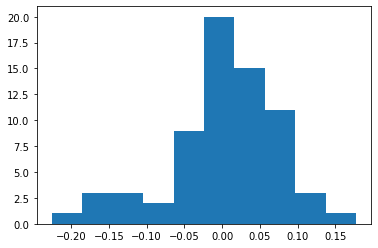

In [14]:
#H0: The Null Hypothesis mean(INTEL) > mean(AMD)
INTEL['r'] = np.log(INTEL['Adj Close']) - np.log(INTEL['Adj Close'].shift(1))
plt.hist(INTEL['r'], bins=10)
plt.show()

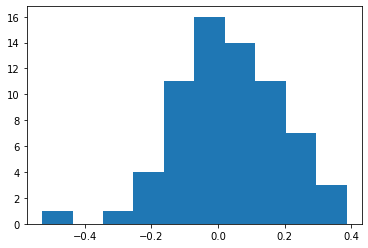

In [13]:
#Ha: The Alternative Hypothesis mean(INTEL) < mean(AMD)
AMD['r'] = np.log(AMD['Adj Close']) - np.log(AMD['Adj Close'].shift(1))
plt.hist(AMD['r'], bins=10)
plt.show()

In [6]:
intel_mean = INTEL['r'].mean()
intel_std = INTEL['r'].std()

amd_mean = AMD['r'].mean()
amd_std = AMD['r'].std()

print(f"MEAN - Intel: {intel_mean}, AMD: {amd_mean}")
print(f"STD - Intel: {intel_std}, AMD: {amd_std}")

MEAN - Intel: 0.0019932395573901826, AMD: 0.033437135141487134
STD - Intel: 0.07450912343348898, AMD: 0.16089199137202237


In [8]:
dif = intel_mean - amd_mean
dif

-0.03144389558409695

In [23]:
# t-statistic
t = (dif - 0) / np.sqrt(1/(len(INTEL['r'])) * (intel_std**2 + amd_std**2))
t

-1.4731077856067223

PODEMOS OBSEVAR QUE LA HIPOTÉSIS ALTERNATIVA ES LA CORRECTA, YA QUE EL PROMEDIO DE SALIDA DE AMD ES MAYOR AL QUE OBSERVAMOS EN INTEL. SIN EMBARGO, NO PODEMOS DECIR CON SEGURIDAD QUE ESTO OCURRA, YA QUE NUESTRO INTERVALO DE CONFIANZA ES MENOR AL 95%

## __CHALLENGE - IS AMD MEAN RETURN HIGHER THAN INTEL MEAN RETURN?__

Do a t-test to check whether the mean monthly cc return of AMD (AMD) is greater than the mean monthly return of Intel. Use data from Jan 2017 to date.

In [2]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np

# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['AMD','INTC'],start="01/01/2017", end="08/15/2022",interval="m")
sprices=sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()

In [3]:
# Stating the hypotheses: 
# H0: (mean(rAMD) - mean(rINTEL)) = 0
# Ha: (mean(rAMD) - mean(rINTEL)) <> 0

# Calculating the standard error of the difference of the means:
N = sr['AMD'].count()
amdvar = sr['AMD'].var()
intelvar = sr['INTC'].var()
sediff = np.sqrt((1/N) * (amdvar + intelvar ) )

# Calculating the t-Statistic:
t = (sr['AMD'].mean() - sr['INTC'].mean()) / sediff
t

1.465749724512347

In [4]:
# Calculating the pvalue from the t-Statistic:
from scipy import stats as st
# The st.t.sf function calculates the 1-tailed pvalue, so we multiply it by 2 to get the 2-tailed pvalue
# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:
df = ( ((N-1) / N**2) * (amdvar + intelvar)**2  / ( (amdvar/N)**2 + (intelvar/N)**2  ) )
# Now we calculate the pvalue with the t and df:
pvalue = 2 * st.t.sf(np.abs(t), df)
pvalue

0.14608662976489994

In [5]:
# Using the ttest_ind function from stats:
st.ttest_ind(sr['AMD'],sr['INTC'],equal_var=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

Ttest_indResult(statistic=1.465749724512347, pvalue=0.14608662976489994)

In [7]:
import researchpy as rp
# Using the ttest function from researchpy:
rp.ttest(sr['AMD'],sr['INTC'],equal_variances=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

c:\Users\Oscar\anaconda3\envs\DL\lib\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0       AMD   67.0  0.033854  0.162034  0.019796  -0.005669  0.073378
 1      INTC   67.0  0.001877  0.075058  0.009170  -0.016431  0.020185
 2  combined  134.0  0.017866  0.126815  0.010955  -0.003803  0.039535,
                Welch's t-test  results
 0  Difference (AMD - INTC) =    0.0320
 1       Degrees of freedom =   93.8981
 2                        t =    1.4657
 3    Two side test p value =    0.1461
 4   Difference < 0 p value =    0.9270
 5   Difference > 0 p value =    0.0730
 6                Cohen's d =    0.2532
 7                Hedge's g =    0.2518
 8            Glass's delta =    0.1973
 9              Pearson's r =    0.1496)

## __Measures of linear relationship__

Let’s start with an example. Imagine we want to see whether there is a relationship between the OIL price and the Microsoft stock price. The S&P500 is an index that represents the 500 bigest US companies, which is a good representation of the US financial market. We will use monthly data for the last 3-4 years.

Let’s download the data and do the corresponding return calculation. Instead of pandas, we will use yfinance to download online data from Yahoo Finance.

In [9]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


Unfortunately, the range of stock prices and market indexes can vary a lot, so this makes difficult to compare price movements in one plot. For example, if we plot the MSFT prices and the S&P500:

<Figure size 432x288 with 0 Axes>

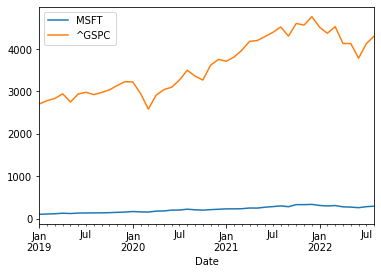

In [10]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

It looks like the GSPC has had a better performance, but this is misleading since both investment have different range of prices.

When comparing the performance of 2 or more stock prices and/or indexes, it is a good idea to generate an index for each series, so that we can emulate how much $1.00 invested in each stock/index would have moved over time. We can divide the stock price of any month by the stock price of the first month to get a growth factor:

In [11]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

Now we can plot these 2 new indexes over time and see which investment was better:

<Figure size 432x288 with 0 Axes>

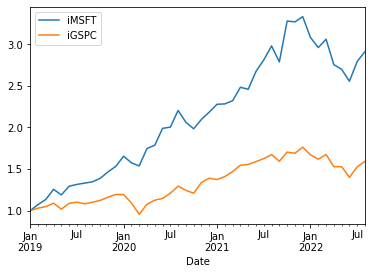

In [12]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

Now we calculate continuously compounded monthly returns. With pandas most of the data management functions works row-wise. In other words, operations are performed to all columns by row:

In [13]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

Now r dataframe will have 2 columns for both cc historical returns:

In [14]:
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083538,0.066658


To learn about the possible relationship between the GSPC and MSFT we can look at their prices and also we can look at their returns.

We start with a scatter plot to see whether there is a linear relationship between the MSFT prices and the GSPC index:

<Figure size 432x288 with 0 Axes>

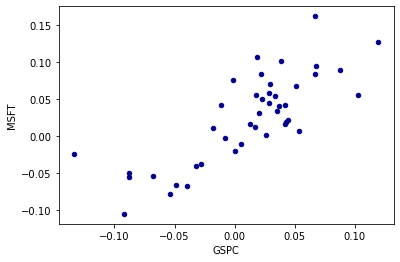

In [15]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

What do you see?

We can also do a scatter plot to visualize the relationship between the MSFT returns and GSPC returns:

<Figure size 432x288 with 0 Axes>

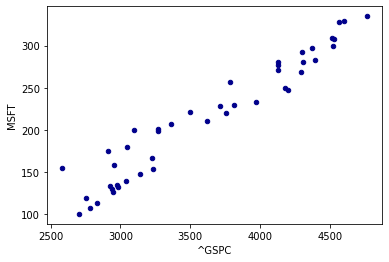

In [16]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

In [19]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr
corr[[0]]
corr[0][1]

0.7918571169535208

What do you see? Which plot conveys a stronger linear relationship?

The scatter plot using the prices conveys an apparent stronger linear relationship compared to the scatter plot using returns.

Stock returns are variables that usually does NOT grow over time; they look like a plot of heart bits:

<Figure size 432x288 with 0 Axes>

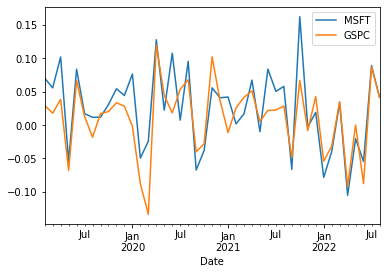

In [20]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

### __Calculating covariance and correlation__

We can program the covariance of 2 variables according to the formula:

In [22]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

0.0025220798103052855

Fortunately, we have the numpy function cov to calculate the covariance:

In [23]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00355253, 0.00252208],
       [0.00252208, 0.00285553]])

The cov function calculates the covariance matrix using both returns. We can find the covariance in the non-diagonal elements, which will be the same values since the covariance matrix is symetric.

The diagonal values have the variances of each return since the covariance of one variable with itself is actually its variance (Cov(X,X) = Var(X) ) .

Then, to extract the covariance between MSFT and GSPC returns we can extract the element in the row 1 and column 2 of the matrix:

In [24]:
cov = covm[0,1]
cov

0.002522079810305285

This value is exactly the same we calculated manually.

We can use the corrcoef function of numpy to calculate the correlation matrix:

In [25]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.        , 0.79185712],
       [0.79185712, 1.        ]])

The correlation matrix will have +1 in its diagonal since the correlation of one variable with itself is +1. The non-diagonal value will be the actual correlation between the corresponding 2 variables (the one in the row, and the one in the column).

We could also manually calculate correlation using the previous covariance:

In [26]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7918571169535207

We can use the scipy pearsonr function to calculate correlation and also the 2-tailed pvalue to see whether the correlation is statistically different than zero:

In [27]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

(0.7918571169535209, 2.55601138733808e-10)

The pvalue is almost zero (2.4e-10) . MSFT and GSPC returns have a positive and very significant correlation (at the 99.9999…% confidence level).